In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import rdkit

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cwd = %pwd

## Run Training

In [14]:
%cd $cwd
%cd gnn/main
!python train.py

The code uses a GPU!
/home/zhang/elix
/home/zhang/elix/gnn/main
The code uses a GPU!
Preprocessing the erbb1_clean_log_ic50 dataset.
Just a moment......
----------------------------------------------------------------------------------------------------
The preprocess has finished!
# of training data samples: 5517
# of development data samples: 552
# of test data samples: 1375
----------------------------------------------------------------------------------------------------
Creating a model.
# of model parameters: 530651
----------------------------------------------------------------------------------------------------
Start training.
The result is saved in the output directory every epoch!
The training will finish in about 0 hours 19 minutes.
----------------------------------------------------------------------------------------------------
Epoch	Time(sec)	Loss_train	MAE_train	MAE_test
1	5.711662724614143	4219.664638519287	5.488271040652973	5.77082952633771
2	11.313819234259427	23

## Load model

In [27]:
import gnn.main.predict as predict
import gnn.main.config as config
import gnn.main.models as models

%cd $cwd
gnn_model = models.MolecularGraphNeuralNetwork(10000, config.dim, config.layer_hidden, config.layer_output)
gnn_model.load_state_dict(torch.load('gnn/model/sd200_gnn.pth'))
dicts = predict.load_gnn_dicts('gnn/main/')
gnn_model.to(config.device)
#gnn_model = predict.load_gnn_model('gnn/model/200_gnn.pth', config.device)

/home/zhang/elix
load atom
load bond
load fp
load edge


MolecularGraphNeuralNetwork(
  (embed_fingerprint): Embedding(10000, 50)
  (W_fingerprint): ModuleList(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=50, bias=True)
    (5): Linear(in_features=50, out_features=50, bias=True)
  )
  (W_output): ModuleList(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=50, bias=True)
    (5): Linear(in_features=50, out_features=50, bias=True)
  )
  (W_property): Linear(in_features=50, out_features=1, bias=True)
)

## Run Testing

In [33]:
test_smiles = 'CCCC'
res = predict.predict_vec(gnn_model,'regression',
                          'gnn/dataset/regression/erbb1_clean_log_ic50/', 1, 
                          'erbb1_clean_log_ic50', config.device, [test_smiles], dicts)

CCCC | 9.877759


## Visualize Training Results

In [5]:
df = pd.read_csv('gnn/output/result--test.txt', sep = '\t')

In [6]:
df

,Epoch,Time(sec),Loss_train,MAE_train,MAE_test
0,1,5.403719,4219.664639,5.488271,5.770830
1,2,10.952668,2336.885392,3.563372,3.552437
2,3,16.600611,1387.334503,2.968859,3.003387
3,4,21.811553,1032.987999,2.692146,2.738769
4,5,27.149986,944.056887,2.580973,2.634069
...,...,...,...,...,...
195,196,1022.797606,170.654905,1.048338,1.396675
196,197,1028.371133,164.957431,1.134383,1.463959
197,198,1033.691420,160.250062,1.065702,1.434271
198,199,1039.857382,162.885215,1.124007,1.471956


In [37]:
import matplotlib.font_manager
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

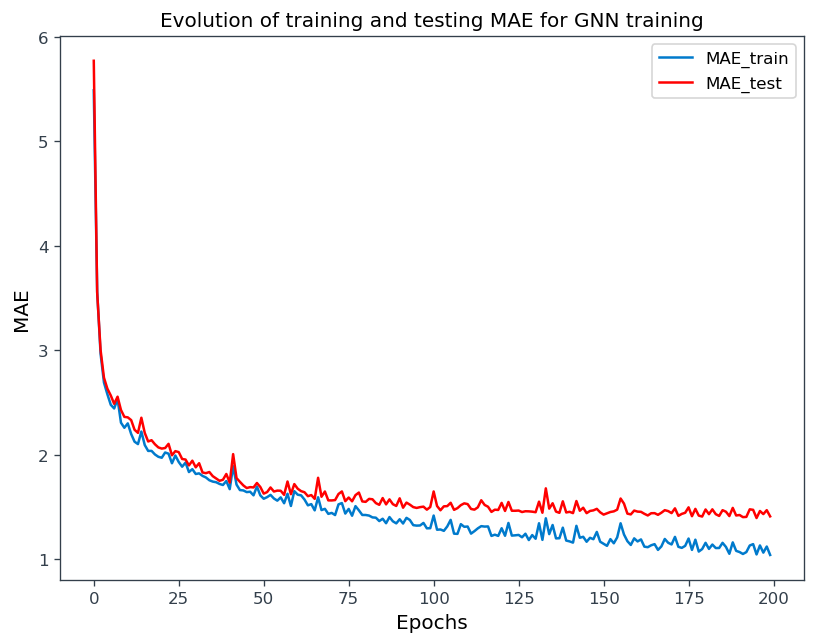

In [41]:
plt.figure(figsize=(8, 6), dpi=120)
ax = plt.gca()
df.plot(kind='line',y='MAE_train',color='#007acc', ax=ax)
df.plot(kind='line',y='MAE_test',color='red', ax=ax)
#ax.xlabel("hi")
ax.set_xlabel('Epochs', fontsize = 12)
ax.set_ylabel("MAE", fontsize = 12)
plt.title("Evolution of training and testing MAE for GNN training")
plt.show()